<a href="https://colab.research.google.com/github/Deepa-Murugesan/AIchatBot/blob/main/Assignment_5_liblinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import relavent packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_digits
from sklearn import metrics

digits = load_digits()

In [2]:
print ("Data Shape", digits.data.shape)

Data Shape (1797, 64)


In [3]:
print ("Label Data shape", digits.target.shape)

Label Data shape (1797,)


In [4]:
#split Data into testing and training set with the testing/traning data size as 25% and 75%
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                   test_size=0.25, random_state=0)

In [6]:
#setup the model
logistic_reg_model = LogisticRegression(solver='liblinear', random_state=0) #choose solver. default is lbfgs
#fit the model with x_train:digits, y_train:labels
logistic_reg_model.fit(x_train,y_train)


LogisticRegression(random_state=0, solver='liblinear')

In [7]:
#predict one observation
logistic_reg_model.predict(x_test[0].reshape(1,-1))

array([2])

In [8]:
#predict all labels
logistic_reg_model.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [13]:
#Make predictions on the entire test data of 1797 images
y_pred = logistic_reg_model.predict(x_test)

In [10]:
#use model to predict probability.
y_pred_proba = logistic_reg_model.predict_proba(x_test)

#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_proba,multi_class='ovr')

#print AUC score
print(auc)

0.9977075714841488


In [11]:
#Accuracy of the model 
score = logistic_reg_model.score(x_test,y_test)
print (score)

0.9533333333333334


In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



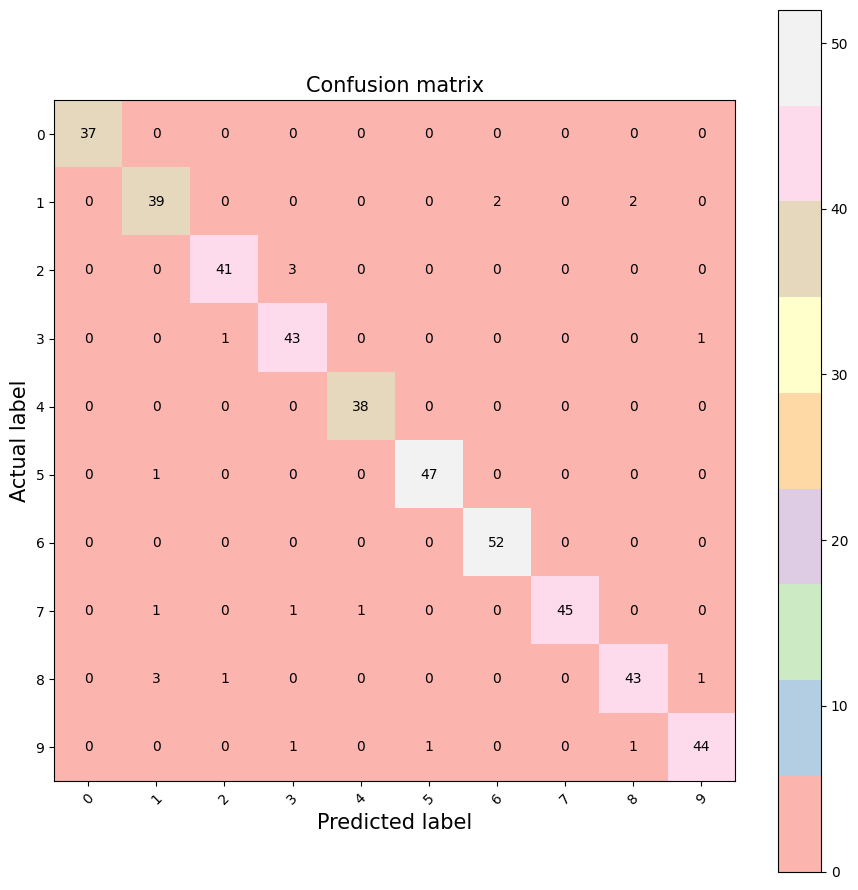

In [12]:
#confusion Matrix
cm = metrics.confusion_matrix(y_test, logistic_reg_model.predict(x_test))
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape

for x in range(10):
    for y in range(10):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')
#plt.savefig('EUID_digits_LR__CM.png')
plt.show()